In [24]:
import pandas as pd
import numpy as np

# all_df = pd.read_pickle('all_unshattered_beep_df_randomized.pkl')
all_df = pd.read_pickle('S00_Session3_unshattered_beep_df.pkl')


In [25]:
all_df.EXP_INFO


Lower,S00
0,"Ses_3, Block_0, Q_ind_0"
1,"Ses_3, Block_0, Q_ind_1"
2,"Ses_3, Block_0, Q_ind_2"
3,"Ses_3, Block_0, Q_ind_3"
4,"Ses_3, Block_0, Q_ind_4"
...,...
195,"Ses_3, Block_3, Q_ind_45"
196,"Ses_3, Block_3, Q_ind_46"
197,"Ses_3, Block_3, Q_ind_47"
198,"Ses_3, Block_3, Q_ind_48"


In [26]:
all_df.SENTENCE_INFO


Lower,permanent_index,article_id,sen_id,sen_content,beeped_sen_content,beep_word_type,beeped_word,beeped_word_duration,beeped_word_timestamp_start,beeped_word_timestamp_end,last_word_flag,sentence_duration
0,675,674,0,Floras Eltern machen eine Kreuzfahrt mit einem...,Floras Eltern [MASK] eine Kreuzfahrt mit einem...,VERB,machen,0.402,1.110,1.512,False,4.432
1,410,409,0,Ich habe gestern Abend mit meiner Mutter geredet.,Ich habe gestern Abend mit meiner Mutter [MASK].,VERB,geredet,0.639,2.226,2.865,True,2.865
2,493,492,0,Arbeitslos-sein bedeutet: man hat keinen Arbei...,Arbeitslos-sein [MASK]: man hat keinen Arbeits...,VERB,bedeutet,0.606,1.070,1.676,False,3.398
3,658,657,0,Das Zimmer kostet ein Hundert Euro pro Nacht.,Das Zimmer [MASK] ein Hundert Euro pro Nacht.,VERB,kostet,0.503,0.693,1.196,False,2.851
4,402,401,0,"Ich habe keine Ahnung, wie viel du für das Aut...","Ich habe keine Ahnung, wie viel du für das Aut...",VERB,raten,0.580,4.616,5.196,True,5.196
...,...,...,...,...,...,...,...,...,...,...,...,...
195,153,152,0,"Wir sollten in den Bus einsteigen, bevor er ab...","Wir sollten in den Bus [MASK], bevor er abfährt.",VERB,einsteigen,0.753,1.225,1.978,False,3.074
196,121,120,0,Ich möchte einen Flug nach Spanien buchen.,Ich möchte einen Flug nach Spanien [MASK].,VERB,buchen,0.482,2.088,2.570,True,2.570
197,5,4,0,Für dieses Produkt wird keine technische Unter...,Für dieses Produkt wird keine technische Unter...,VERB,angeboten,0.817,3.319,4.136,True,4.136
198,203,202,0,Im ganzen Umkreis war kein Haus zu finden.,Im ganzen Umkreis war kein Haus zu [MASK].,VERB,finden,0.523,2.260,2.783,True,2.783


In [27]:
all_df.META_INFO

Lower,audio_rate,pitch,language,tag_list,n_tag
0,0.9,0.0,German,"[[Floras, PROPN], [Eltern, NOUN], [machen, VER...",12
1,0.9,0.0,German,"[[Ich, PRON], [habe, AUX], [gestern, ADV], [Ab...",8
2,0.9,0.0,German,"[[Arbeitslos-sein, NOUN], [bedeutet, VERB], [m...",6
3,0.9,0.0,German,"[[Das, DET], [Zimmer, NOUN], [kostet, VERB], [...",8
4,0.9,0.0,German,"[[Ich, PRON], [habe, AUX], [keine, DET], [Ahnu...",17
...,...,...,...,...,...
195,0.9,0.0,German,"[[Wir, PRON], [sollten, VERB], [in, ADP], [den...",9
196,0.9,0.0,German,"[[Ich, PRON], [möchte, VERB], [einen, DET], [F...",7
197,0.9,0.0,German,"[[Für, ADP], [dieses, DET], [Produkt, NOUN], [...",9
198,0.9,0.0,German,"[[Im, ADP], [ganzen, ADJ], [Umkreis, NOUN], [w...",8


Number of censored word locating at last: 100


Text(0.5, 1.0, 'Timestamp of the end of censored word/Duration of whole sentence')

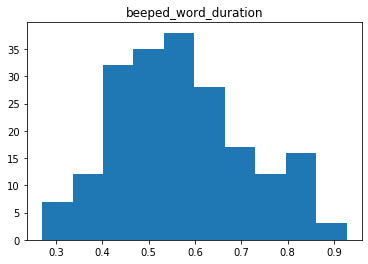

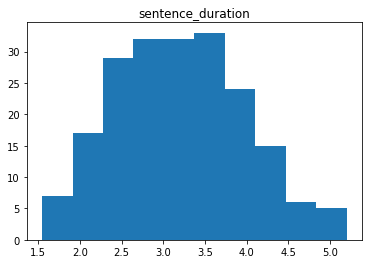

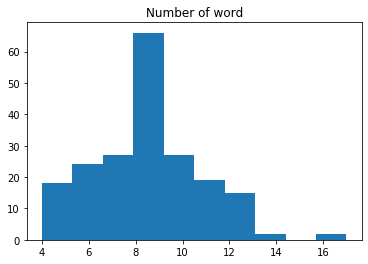

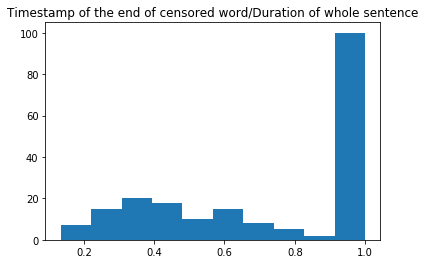

In [28]:

print('Number of censored word locating at last: {0}'.format(
    all_df.SENTENCE_INFO.last_word_flag.sum()))
import matplotlib.pyplot as plt
plt.figure()
plt.hist(all_df.SENTENCE_INFO.beeped_word_duration.values)
plt.title('beeped_word_duration')
plt.figure()
plt.hist(all_df.SENTENCE_INFO.sentence_duration.values)
plt.title('sentence_duration')
plt.figure()
plt.hist(all_df.META_INFO.n_tag.values)
plt.title('Number of word')
plt.figure()
plt.hist(all_df.SENTENCE_INFO.beeped_word_timestamp_end.values/
         all_df.SENTENCE_INFO.sentence_duration.values)
plt.title('Timestamp of the end of censored word/Duration of whole sentence')

In [17]:
sen_dur = all_df.SENTENCE_INFO.sentence_duration.values
word_dur = all_df.SENTENCE_INFO.beeped_word_duration.values
np.where(sen_dur==sen_dur.max())
sen_dur.max()

5.589

In [18]:
len(ccc)

NameError: name 'ccc' is not defined

In [ ]:
all_df.censored_word_id_relative.values

In [ ]:
all_df.permanent_index.values == np.arange(1,801)